In [1]:
# import needed modules

import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
import pydicom
from scipy import ndimage
from tqdm import tqdm
from statistics import mode

# Delete Excluded Samples

In [2]:
samples_dir = '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train'
test_dir = '../input/rsna-miccai-brain-tumor-radiogenomic-classification/test'

samples_list = os.listdir(samples_dir)
test_list = os.listdir(test_dir)

samples_list.sort()
test_list.sort()

print('the amount of all samples data:' , len(samples_list))
print('the amount of test data:' , len(test_list))

the amount of all samples data: 585
the amount of test data: 87


In [3]:
# find excluded samples

exclu_list = ['00109' , '00123' , '00709']
for  k , v in enumerate(samples_list):
    if v in exclu_list:
        print(k)

71
81
488


In [4]:
for i in exclu_list:
    samples_list.remove(i)

In [5]:
print('the amount of train data after removing extra sampels:' , len(samples_list))

the amount of train data after removing extra sampels: 582


In [6]:
# remove extra samples from labels

labels_dir = '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv'
samples_labels = pd.read_csv(labels_dir)
samples_labels = samples_labels.drop([71,81,488])
samples_labels

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1
...,...,...
580,1005,1
581,1007,1
582,1008,1
583,1009,0


In [7]:
print('samples length:',len(samples_list),'|', 'test length:',len(test_list))

samples length: 582 | test length: 87


# Usefull Functions

In [8]:
def dicom2numpy(base_dir , file_dir):
    filename = pydicom.data.data_manager.get_files(base_dir, file_dir)[0]
    ds = pydicom.dcmread(filename)
    return ds.pixel_array

In [9]:
def dicomdir2numpy(folder_dir):
    arr = []
    dicom_list = os.listdir(folder_dir)
    dicom_list.sort()
    for item in dicom_list:
        arr.append(dicom2numpy(folder_dir , item))
    arr = np.asarray(arr)
    final_arr = np.reshape(arr , (np.shape(arr)[1],np.shape(arr)[2],np.shape(arr)[0]))
    return final_arr

In [10]:
def resize(img,desired_width = 64,desired_height = 64,desired_depth = 32):
    """Resize across z-axis"""
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth_factor = desired_depth / current_depth
    width_factor = desired_width / current_width
    height_factor = desired_height / current_height
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return np.expand_dims(img,axis=-1)

# Convert All Samples to Numpy Array

## Train FLAIR

In [11]:
train_flair_list = []
for i in tqdm(samples_list):
    s_dir = os.path.join(samples_dir , i , 'FLAIR')
    train_flair_list.append(resize(dicomdir2numpy(s_dir)))

train_flair = np.asarray(train_flair_list)

100%|██████████| 582/582 [11:02<00:00,  1.14s/it]


In [12]:
train_flair = (train_flair - np.mean(train_flair))/np.std(train_flair)

In [13]:
train_flair = train_flair.astype('float32')

In [14]:
np.savez('./train_flair' , train_flair)

## Train T1w

In [15]:
train_t1w_list = []
for i in tqdm(samples_list):
    s_dir = os.path.join(samples_dir , i , 'T1w')
    train_t1w_list.append(resize(dicomdir2numpy(s_dir)))

train_t1w = np.asarray(train_t1w_list)

100%|██████████| 582/582 [09:26<00:00,  1.03it/s]


In [16]:
train_t1w = (train_t1w - np.mean(train_t1w)) / np.std(train_t1w)

In [17]:
train_t1w = train_t1w.astype('float32')

In [18]:
np.savez('./train_t1w' , train_t1w)

## Train T1wCE

In [19]:
train_t1wce_list = []
for i in tqdm(samples_list):
    s_dir = os.path.join(samples_dir , i , 'T1wCE')
    train_t1wce_list.append(resize(dicomdir2numpy(s_dir)))

train_t1wce = np.asarray(train_t1wce_list)

100%|██████████| 582/582 [12:41<00:00,  1.31s/it]


In [20]:
train_t1wce = (train_t1wce - np.mean(train_t1wce)) / np.std(train_t1wce)

In [21]:
train_t1wce = train_t1wce.astype('float32')

In [22]:
np.savez('./train_t1wce' , train_t1wce)

## Train T2w

In [23]:
train_t2w_list = []
for i in tqdm(samples_list):
    s_dir = os.path.join(samples_dir , i , 'T2w')
    train_t2w_list.append(resize(dicomdir2numpy(s_dir)))

train_t2w = np.asarray(train_t2w_list)

100%|██████████| 582/582 [14:50<00:00,  1.53s/it]


In [24]:
train_t2w = (train_t2w - np.mean(train_t2w)) / np.std(train_t2w)

In [25]:
train_t2w = train_t2w.astype('float32')

In [26]:
np.savez('./train_t2w' , train_t2w)

## Test FLAIR

In [27]:
test_flair_list = []
for i in tqdm(test_list):
    s_dir = os.path.join(test_dir , i , 'FLAIR')
    test_flair_list.append(resize(dicomdir2numpy(s_dir)))

test_flair = np.asarray(test_flair_list)

100%|██████████| 87/87 [01:30<00:00,  1.04s/it]


In [28]:
test_flair = (test_flair - np.mean(train_flair)) / np.std(train_flair)

In [29]:
test_flair = test_flair.astype('float32')

In [30]:
np.savez('./test_flair' , test_flair)

## Test T1w

In [31]:
test_t1w_list = []
for i in tqdm(test_list):
    s_dir = os.path.join(test_dir , i , 'T1w')
    test_t1w_list.append(resize(dicomdir2numpy(s_dir)))

test_t1w = np.asarray(test_t1w_list)

100%|██████████| 87/87 [01:33<00:00,  1.08s/it]


In [32]:
test_t1w = (test_t1w - np.mean(train_t1w)) / np.std(train_t1w)

In [33]:
test_t1w = test_t1w.astype('float32')

In [34]:
np.savez('./test_t1w' , test_t1w)

## Test T1wCE

In [35]:
test_t1wce_list = []
for i in tqdm(test_list):
    s_dir = os.path.join(test_dir , i , 'T1wCE')
    test_t1wce_list.append(resize(dicomdir2numpy(s_dir)))

test_t1wce = np.asarray(test_t1wce_list)

100%|██████████| 87/87 [01:54<00:00,  1.32s/it]


In [36]:
test_t1wce = (test_t1wce - np.mean(train_t1wce)) / np.std(train_t1wce)

In [37]:
test_t1wce = test_t1wce.astype('float32')

In [38]:
np.savez('./test_t1wce' , test_t1wce)

## Test T2w

In [39]:
test_t2w_list = []
for i in tqdm(test_list):
    s_dir = os.path.join(test_dir , i , 'T2w')
    test_t2w_list.append(resize(dicomdir2numpy(s_dir)))

test_t2w = np.asarray(test_t2w_list)

100%|██████████| 87/87 [02:09<00:00,  1.48s/it]


In [40]:
test_t2w = (test_t2w - np.mean(train_t2w)) / np.std(train_t2w)

In [41]:
test_t2w = test_t2w.astype('float32')

In [42]:
np.savez('./test_t2w' , test_t2w)

# Design Model

In [43]:
# base model

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

def initial_model(width=64, height=64, depth=32):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    # Define the model.
    model = keras.Model(inputs, x)
    return model

In [44]:
base_model = initial_model()
base_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 32, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 62, 62, 30, 64)    1792      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 31, 31, 15, 64)    0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 15, 64)    256       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 29, 29, 13, 64)    110656    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 14, 14, 6, 64)     0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 6, 64)     256   

In [45]:
flair_input =  keras.Input(shape=(64, 64, 32, 1),name='flair_input')
t1w_input = keras.Input(shape=(64, 64, 32, 1),name='t1w_input')
t1wce_input = keras.Input(shape=(64, 64, 32, 1),name='t1wce_input')
t2w_input = keras.Input(shape=(64, 64, 32, 1),name='t2w_input')

falir_output = base_model(flair_input)
t1w_output = base_model(t1w_input)
t1wce_output = base_model(t1wce_input)
t2w_output = base_model(t2w_input)

merge = layers.concatenate([falir_output,t1w_output,t1wce_output,t2w_output])

last = layers.Dense(units=1, activation="sigmoid")(merge)

model = keras.Model([flair_input,t1w_input,t1wce_input,t2w_input], last)

In [46]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
flair_input (InputLayer)        [(None, 64, 64, 32,  0                                            
__________________________________________________________________________________________________
t1w_input (InputLayer)          [(None, 64, 64, 32,  0                                            
__________________________________________________________________________________________________
t1wce_input (InputLayer)        [(None, 64, 64, 32,  0                                            
__________________________________________________________________________________________________
t2w_input (InputLayer)          [(None, 64, 64, 32,  0                                            
____________________________________________________________________________________________

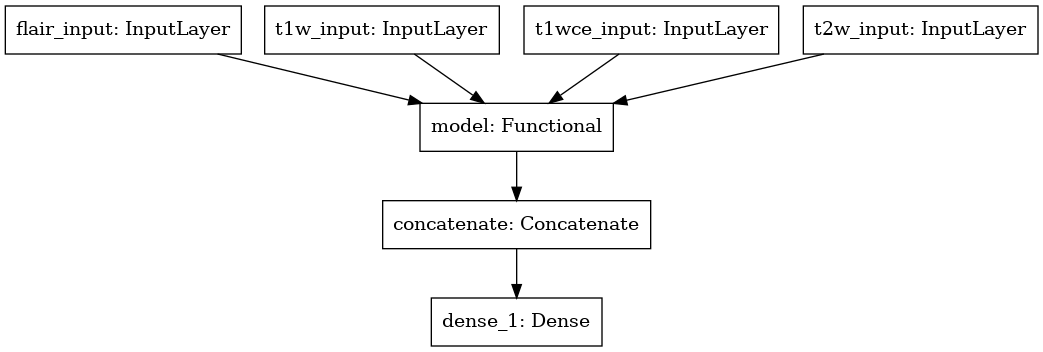

In [47]:
from keras.utils import plot_model
plot_model(model)

# Split Train Validation set

In [48]:
labels = samples_labels.drop(columns='BraTS21ID')
labels

,MGMT_value
0,1
1,1
2,0
3,1
4,1
...,...
580,1
581,1
582,1
583,0


In [49]:
labels = labels.values

In [50]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10 , shuffle = True , random_state = 42)
train_indices = []
test_indices = []

for train_index, test_index in skf.split(train_flair, labels):
    train_indices.append(train_index)
    test_indices.append(test_index)

In [51]:
idx1 = train_indices[0]
idx2 = test_indices[0]

print(len(idx1) , '|' , len(idx2))

523 | 59


# Find Optimal LR

In [52]:
# finding appropreate learning rate

#lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#    lambda epoch:1e-8 * 10 ** (epoch/20)
#)

#model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['acc'])

In [53]:
#history = model.fit([train_flair[idx1], train_t1w[idx1], train_t1wce[idx1], train_t2w[idx1]] ,
#                 labels[idx1],
#                 epochs = 100,
#                 validation_data = ([train_flair[idx2], train_t1w[idx2], train_t1wce[idx2], train_t2w[idx2]],
#                                    labels[idx2]),
#                 callbacks=[lr_schedule],
#                    batch_size = 16,
#                 verbose = 1)

In [54]:
#plot learning rate schedule batch_size = 32

#import matplotlib.pyplot as plt

#lrs = 1e-8 * (10**(np.arange(100)/20))
#plt.semilogx(lrs , history.history['val_loss'])
#plt.title('learning rate vs validation loss (10e-8 to 10e-3)')
#plt.figure()
#plt.semilogx(lrs , history.history['loss'])
#plt.title('learning rate vs loss (10e-8 to 10e-3)')
#plt.figure()

#plt.show()

# Train Model

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6) , 
              loss='binary_crossentropy' , metrics=['acc'])
best_callback = tf.keras.callbacks.ModelCheckpoint('./model.h5', monitor='val_loss',
                                                   save_best_only=True)

In [56]:
history = model.fit([train_flair[idx1], train_t1w[idx1], train_t1wce[idx1], train_t2w[idx1]] ,
                 labels[idx1],
                 epochs = 300,
                 validation_data = ([train_flair[idx2], train_t1w[idx2], train_t1wce[idx2], train_t2w[idx2]],
                                    labels[idx2]),
                 callbacks=[best_callback],
                 verbose = 1)

Epoch 1/300
17/17 [==============================] - 21s 677ms/step - loss: 0.7112 - acc: 0.5065 - val_loss: 0.6975 - val_acc: 0.4915
Epoch 2/300
17/17 [==============================] - 10s 604ms/step - loss: 0.7087 - acc: 0.5250 - val_loss: 0.7084 - val_acc: 0.4746
Epoch 3/300
17/17 [==============================] - 10s 608ms/step - loss: 0.7038 - acc: 0.5035 - val_loss: 0.7167 - val_acc: 0.4915
Epoch 4/300
17/17 [==============================] - 10s 604ms/step - loss: 0.7081 - acc: 0.4708 - val_loss: 0.7210 - val_acc: 0.4915
Epoch 5/300
17/17 [==============================] - 10s 606ms/step - loss: 0.6917 - acc: 0.5371 - val_loss: 0.7219 - val_acc: 0.4915
Epoch 6/300
17/17 [==============================] - 10s 603ms/step - loss: 0.6817 - acc: 0.5977 - val_loss: 0.7177 - val_acc: 0.4746
Epoch 7/300
17/17 [==============================] - 10s 603ms/step - loss: 0.7031 - acc: 0.4807 - val_loss: 0.7109 - val_acc: 0.5085
Epoch 8/300
17/17 [==============================] - 10s 604ms

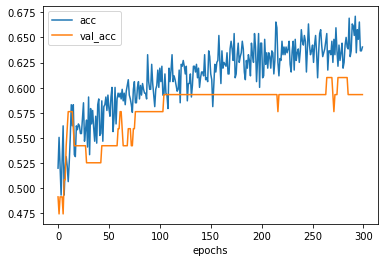

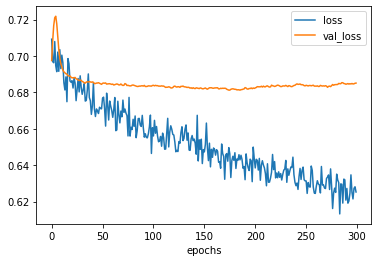

<Figure size 432x288 with 0 Axes>

In [57]:
# plot accuracy and loss

import matplotlib.pyplot as plt

epochs = range(len(history.history['acc']))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs , acc , label = 'acc')
plt.plot(epochs , val_acc , label = 'val_acc')
plt.xlabel('epochs')
plt.legend(loc = 'best')
plt.figure()


plt.plot(epochs , loss , label = 'loss')
plt.plot(epochs , val_loss , label = 'val_loss')
plt.xlabel('epochs')
plt.legend(loc = 'best')
plt.figure()

plt.show()

In [58]:
final_model = tf.keras.models.load_model('./model.h5')

In [59]:
pred = final_model.predict([train_flair[idx2], train_t1w[idx2], train_t1wce[idx2], train_t2w[idx2]])

In [60]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

max_auc = 0
precision, recall, threshold = precision_recall_curve(labels[idx2] , pred)
for t in threshold:
    prediction = np.zeros(np.shape(pred))
    prediction[pred > t] = 1
    tmp_auc = roc_auc_score(labels[idx2] , prediction)
    if tmp_auc > max_auc:
        max_auc = tmp_auc
        opt_thresh = [t]
print('AUC is:' , np.round(max_auc,4))
print('Optimum Threshold is:' , opt_thresh)

AUC is: 0.6187
Optimum Threshold is: [0.56293935]


In [61]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(labels[idx2] , pred)
print('AUC is:' , np.round(auc,4))

AUC is: 0.6048


In [62]:
final_model.evaluate([train_flair[idx2], train_t1w[idx2], train_t1wce[idx2], train_t2w[idx2]],
                                    labels[idx2])

2/2 [==============================] - 1s 159ms/step - loss: 0.6813 - acc: 0.5932


[0.6812521815299988, 0.5932203531265259]

In [63]:
#from sklearn.metrics import precision_recall_curve
#def find_opt_thresh(label , prediction):
#    opt_threshold = []

    # Get precision-recall curve
#    precision, recall, threshold = precision_recall_curve(label, prediction)

    # Compute f1 score for each point (use nan_to_num to avoid nans messing up the results)
#    f1_score = np.nan_to_num(2 * precision * recall / (precision + recall))

    # Select threshold that maximize f1 score
#    index = np.argmax(f1_score)
 #   t = threshold[index-1] if index != 0 else threshold[0]-1e-10
  #  opt_threshold.append(t)

 #   return opt_threshold

In [64]:
#prediction = np.zeros(np.shape(pred))
#thresh = find_opt_thresh(labels[idx2] , pred)
#prediction[pred > thresh] = 1
#auc = roc_auc_score(labels[idx2] , prediction)
#print('AUC is:' , np.round(auc,4))

In [65]:
#prediction = np.zeros(np.shape(pred))
#thresh = find_opt_thresh(labels[idx2] , pred)
#prediction[pred > 0.5] = 1
#auc = roc_auc_score(labels[idx2] , prediction)
#print('AUC is:' , np.round(auc,4))

In [66]:
test_pred = final_model.predict([test_flair, test_t1w, test_t1wce, test_t2w])

In [67]:
test_prediction = np.zeros(np.shape(test_pred))
test_prediction[test_pred > opt_thresh] = 1

In [68]:
# preparing submission.csv

fhand = open('submission.csv' , 'w')
fhand.write('BraTS21ID,MGMT_value')
fhand.write('\n')


for k,v in enumerate(test_prediction):

    fhand.write(test_list[k]+','+str(v[0]))
    fhand.write('\n')
    
fhand.close()

In [69]:
pd.read_csv('./submission.csv')

,BraTS21ID,MGMT_value
0,1,0.0
1,13,0.0
2,15,0.0
3,27,0.0
4,37,0.0
...,...,...
82,826,0.0
83,829,0.0
84,833,0.0
85,997,0.0
